In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('cement_strength.csv')
import seaborn as sns

In [2]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data_corr = data.corr()

In [4]:
data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


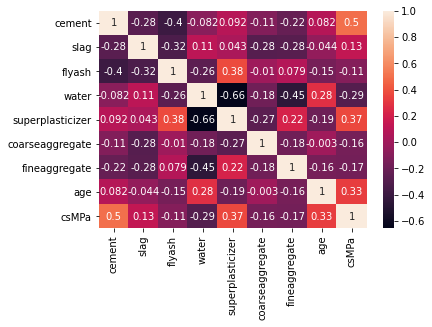

In [5]:
sns.heatmap(data_corr, annot = True)

In [6]:
X = data.drop('csMPa',axis = 1)
y = data['csMPa']

In [7]:
y = y.values.reshape(-1,1)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std = StandardScaler()
X_scaled = std.fit_transform(X)
y_scaled = std.fit_transform(y)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2,random_state = 42)

In [10]:
X_test.shape

(206, 8)

In [11]:
X_train.shape

(824, 8)

In [12]:
y_train.shape

(824, 1)

In [13]:
y_test.shape

(206, 1)

In [14]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10,input_dim = 8, activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
epoch_hist = model.fit(X_train,y_train, epochs = 300, batch_size = 40,verbose = 1, validation_split = 0.25)

Epoch 1/300
16/16 [==============================] - 0s 24ms/step - loss: 0.9731 - val_loss: 0.7264
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 0.8869 - val_loss: 0.6665
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 0.8044 - val_loss: 0.6038
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 0.7288 - val_loss: 0.5453
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 0.6641 - val_loss: 0.4994
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 0.6102 - val_loss: 0.4655
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 0.5668 - val_loss: 0.4372
Epoch 8/300
16/16 [==============================] - 0s 3ms/step - loss: 0.5279 - val_loss: 0.4156
Epoch 9/300
16/16 [==============================] - 0s 3ms/step - loss: 0.4929 - val_loss: 0.3996
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4688 - val_loss: 0.3864
Epoch 11

16/16 [==============================] - 0s 3ms/step - loss: 0.1428 - val_loss: 0.1791
Epoch 84/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1398 - val_loss: 0.1770
Epoch 85/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1371 - val_loss: 0.1751
Epoch 86/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1392 - val_loss: 0.1761
Epoch 87/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1357 - val_loss: 0.1737
Epoch 88/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1368 - val_loss: 0.1734
Epoch 89/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1352 - val_loss: 0.1774
Epoch 90/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1722
Epoch 91/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1708
Epoch 92/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1721
Epoch 93/300


16/16 [==============================] - 0s 3ms/step - loss: 0.0951 - val_loss: 0.1386
Epoch 165/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0952 - val_loss: 0.1414
Epoch 166/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0952 - val_loss: 0.1392
Epoch 167/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 0.1398
Epoch 168/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 0.1388
Epoch 169/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 0.1386
Epoch 170/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0911 - val_loss: 0.1368
Epoch 171/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0906 - val_loss: 0.1393
Epoch 172/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0910 - val_loss: 0.1376
Epoch 173/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0903 - val_loss: 0.1388
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 0.0737 - val_loss: 0.1373
Epoch 246/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0785 - val_loss: 0.1324
Epoch 247/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0734 - val_loss: 0.1340
Epoch 248/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0729 - val_loss: 0.1363
Epoch 249/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0721 - val_loss: 0.1343
Epoch 250/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0719 - val_loss: 0.1368
Epoch 251/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0750 - val_loss: 0.1323
Epoch 252/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0713 - val_loss: 0.1366
Epoch 253/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0724 - val_loss: 0.1367
Epoch 254/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0718 - val_loss: 0.1364
Epoc

In [18]:
y_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
print("predict score",score)

predict score 0.8254073890087222
